### Описание данных
Данные для первой части
Файл /datasets/hypothesis.csv.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части 

Файл /datasets/orders.csv. 

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Описание проекта
Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

# Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Часть 1. Добавим необходимые библеотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings
from scipy import stats as st

Загрузим данные через try | except

In [2]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

In [3]:
# Посмотрим данные hypothesis
display(hypothesis)
pd.set_option('display.max_colwidth', 130)
hypothesis.duplicated().sum()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


0

In [4]:
# Посмотрим данные orders
display(orders)
orders.duplicated().sum()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


0

In [5]:
#минимальная и максимальная дата orders
print(orders['date'].min())
print(orders['date'].max())

2019-08-01
2019-08-31


In [6]:
# Посмотрим данные visitors
display(visitors)
visitors.duplicated().sum()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


0

In [7]:
#минимальная и максимальная дата visitors
print(visitors['date'].min())
print(visitors['date'].max())

2019-08-01
2019-08-31


Данные без дубликатов, даты совпдают, но есть разница в стиле и записи данных

In [8]:
# Приведем наименования столбцов к "питонному" стилю

hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [9]:
# Посмотреть сколько у нас групп в АВ-тесте.Рассмотрим количество пользователей в каждой группе - по таблице с заказами;
print('Общее количество пользователей -', orders['group'].count())
print('Общее количество пользователей -', orders['group'].unique())
print('количество пользователей в группе А -', orders.query('group == "A"')['visitor_id'].nunique())
print('количество пользователей в группе В -', orders.query('group == "B"')['visitor_id'].nunique())

Общее количество пользователей - 1197
Общее количество пользователей - ['B' 'A']
количество пользователей в группе А - 503
количество пользователей в группе В - 586


In [10]:
#Посмотрим не попадают ли какие-то пользователи в обе группы - по таблице с заказами
duplicated_users = orders.groupby('visitor_id').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
display(duplicated_users.head())
len(duplicated_users)

,groups,group_names
visitor_id,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


58

In [11]:
#минимальная и максимальная дата visitors
print('Минимальная дата группы А -', visitors.query('group == "A"')['date'].min())
print('Максимальная дата группы А - ', visitors.query('group == "A"')['date'].max())
#минимальная и максимальная дата visitors
print('Минимальная дата группы B -', visitors.query('group == "B"')['date'].min())
print('Максимальная дата группы B -', visitors.query('group == "B"')['date'].max())

Минимальная дата группы А - 2019-08-01
Максимальная дата группы А -  2019-08-31
Минимальная дата группы B - 2019-08-01
Максимальная дата группы B - 2019-08-31


Всего 58 пользователей которые входят в обе группы. Даты совпадают по обеям группам. 

### Рассчитаем для каждой из гипотез показатель ICE и отсортируем их по убыванию значения

In [12]:
hypothesis['ICE'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round(2)
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

### Рассчитаем для каждой из гипотез показатель RICE и отсортируем их по убыванию значения

In [13]:
hypothesis['RICE'] = (hypothesis['impact']*hypothesis['confidence']*hypothesis['reach'])/hypothesis['efforts']
print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

### Часть 1. Общий вывод по первому блоку: Явных дубликатов не обнаружено, привели все столбцы к "единому" стилю.

In [14]:
pd.set_option('display.max_colwidth', 500)
hypothesis[['RICE', 'hypothesis', 'ICE']].sort_values(by='RICE', ascending=False)

,RICE,hypothesis,ICE
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Хорошо видно различие в обеих таблицах. Главное меняется тройка лидеров : если в ICE это гипотезы с индексами 8, 0, 7 , то в RICE - 7(была на 3 мете), 2(была на 5), 0(на 2); а лидер таблицы ICE - 8 сместился аж на пятыю позицыию, в то время как 2 перешел на второе место с пятого. Такое отличие продиктовано, тем что в фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок. Поэтому надо предложить для тестирования гипотезу индексом 7.

## Часть 2. Анализ A/B-теста. Расчет кумулятивных метрик, необходимых для анализа.

In [15]:
#делим visitors по группам и считаем кумулятивные данные по датам
# группа А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# группа В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


#делим orders по группам и считаем кумулятивные данные по датам
# группа А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# группа В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#собираем данные в единый фрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [16]:
#минимальная и максимальная дата visitors
print(data['date'].min())
print(data['date'].max())

2019-08-01
2019-08-31


Даты совпдают с исходными данными, можно продолжать.

Напомним названия столбцов данных:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

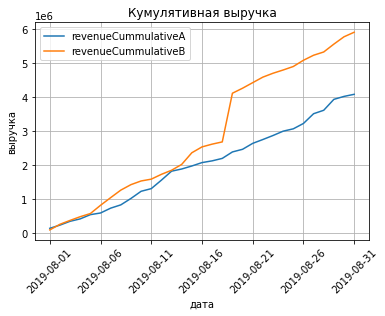

In [17]:
data[['date','revenueCummulativeA', 'revenueCummulativeB']] .plot(x = 'date',
                  grid=True,  title = "Кумулятивная выручка").set(
                  xlabel = 'дата', ylabel = 'выручка')
plt.xticks(rotation=45);

Вывод

Мы видим, что кумулятивная выручка группы А растет линейно, и она меньше, чем у группы В.
При этом в группе В есть резкий скачок в районе 18-го августа, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

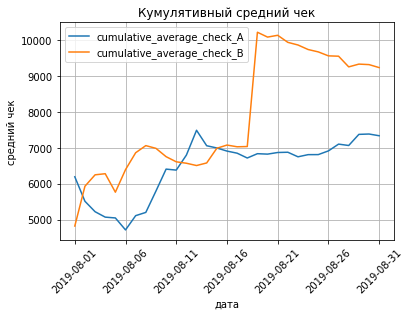

In [18]:
data['cumulative_average_check_A'] = data['revenueCummulativeA'] / data['ordersCummulativeA']
data['cumulative_average_check_B'] = data['revenueCummulativeB'] / data['ordersCummulativeB']

data[['date','cumulative_average_check_A', 'cumulative_average_check_B']] .plot(x = 'date',
                  grid=True,  title = "Кумулятивный средний чек").set(
                  xlabel = 'дата', ylabel = 'средний чек')
plt.xticks(rotation=45);

Вывод

Ситуация с кумулятивным средним чеком между группами не так однозначна: мы видим, что кривая группы В в период с 11 по 15 августа падает ниже уровня группы А, но затем резко растет, что еще раз подтверждает, что в группе В в период 18-19 августа была крупная покупка, которая увеличила размер кумулятивного среднего чека.

### Постройте график относительно различия кумулятивного среднего чека группы B к группе A. 

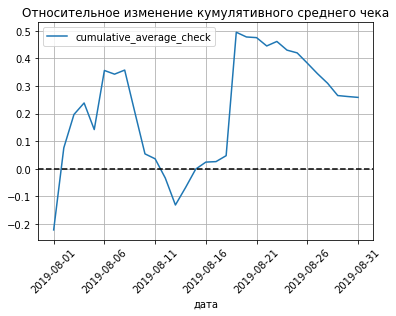

In [19]:
data['cumulative_average_check'] = data['cumulative_average_check_B'] / data['cumulative_average_check_A']-1


data[['date','cumulative_average_check']] .plot(x = 'date',
                  grid=True,  
                  title = "Относительное изменение кумулятивного среднего чека").set(
                  xlabel = 'дата');
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45);

Вывод

График различия среднего чека говорит о том, что результаты группы B нестабильны: мы наблюдаем относительный рост суммы кумулятивного чека группы В примерно до 7 августа, его резкий спад до 12 августа включительно, такой же резкий подъем до 18 августа,  и в последующем медленный спад, но без резких измененний. Кумулятивная выручка группы В все-таки выше, чем у группы А, но она нестабильна. Возможно дело в выбросах.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

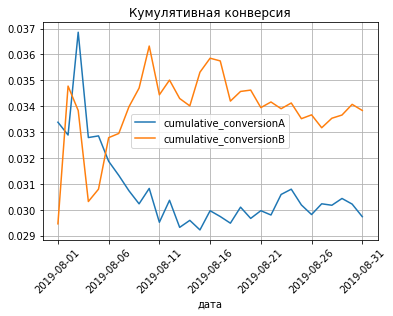

In [20]:
data['cumulative_conversionA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['cumulative_conversionB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']

data[['date','cumulative_conversionA', 'cumulative_conversionB']] .plot(x = 'date',
                  grid=True,  
                  title = "Кумулятивная конверсия").set(
                  xlabel = 'дата')
plt.xticks(rotation=45);

Сначала конверсии колебались, но довольно быстро выровнялись; результат группы В кажется более привлекательным.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

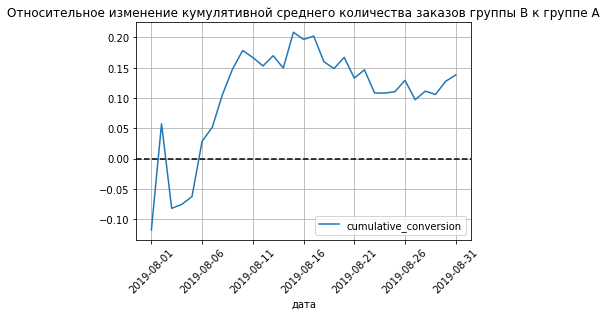

In [21]:

data['cumulative_conversion'] = data['cumulative_conversionB'] / data['cumulative_conversionA']-1


data[['date','cumulative_conversion']] .plot(x = 'date',
                  grid=True,  
                  title = "Относительное изменение кумулятивной среднего количества заказов группы B к группе A").set(
                  xlabel = 'дата');
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45);

Вывод 
График различия конверсии между группами говорит о том  что результаты группы B стабильно лучше группы A
и есть некоторая общая тенденция к его ухудшению.
График выше сигнализировали нам о наличии крупных заказов.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

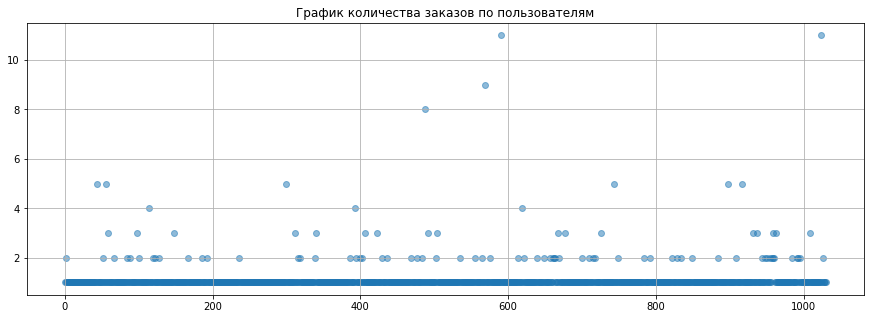

In [22]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']
display(orders_by_users['orders'].describe())
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, orders_by_users['orders'], alpha=0.5);

Вывод
Много пользователей с 2-3 заказами. Все что больше явно выбросы.
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [23]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

В группах не более 1 % клиентов, которые оформили более 4 заказов, и не более 5% оформивших более 2 заказов

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

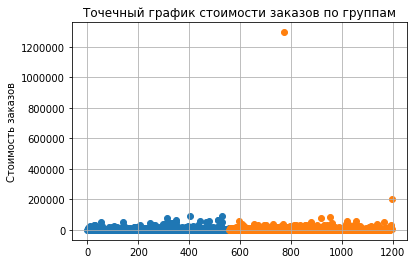

In [24]:
orders_a = orders[orders['group']=='A']
x_values_a = pd.Series(range(0,len(orders_a['revenue'])))
orders_b = orders[orders['group']=='B']
x_values_b = pd.Series(range(len(orders_a['revenue'])+1,len(orders_b['revenue'])+1+len(orders_a['revenue'])))

plt.scatter(x_values_a, orders_a['revenue'], label='A')
plt.scatter(x_values_b, orders_b['revenue'], label='B')
plt.ylabel("Стоимость заказов")
plt.title("Точечный график стоимости заказов по группам")
plt.grid()
plt.ticklabel_format(axis='y',style='plain');

Вывод
У подавляющего большинства пользователей обоих групп сумма заказа не превышает 10 тыс. рублей, порог заказов не превышает 100 тыс руб. Тем не менее на графике группы В можно заметить один аномально большой заказ, превышающий 1,2 млн.руб. Судя по всему это и есть причина резкого скачка кумулятивного среднего чека 18 августа. В остальном группы очень похожи между собой.

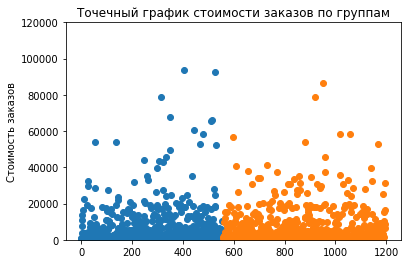

In [25]:

# строим точечную диаграмму
plt.ylim(0, 120000)
plt.scatter(x_values_a, orders_a['revenue'], label='A')
plt.scatter(x_values_b, orders_b['revenue'], label='B')
plt.ylabel("Стоимость заказов")
plt.title("Точечный график стоимости заказов по группам")
plt.show();

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [26]:

print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


В группах не более 5% заказов на сумму свыше 2800 рублей и не более 1% -на сумму свыше 58233 руб.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

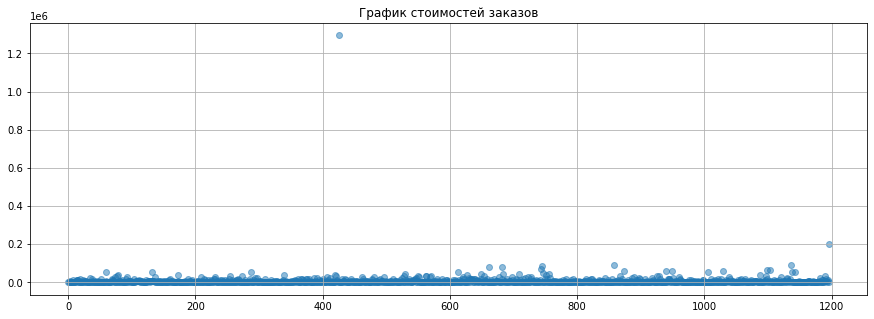

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

Вывод
У подавляющего большинства пользователей обоих групп сумма заказа не превышает 10 тыс. рублей, порог заказов не превышает 100 тыс руб. 

Как видим из преведенных графиков выше больше всего пользователей которые совершили 1 заказ и суммой не более 10 тыс. Тех кто совершили 2 заказа уже не так много. Те кто совершил 3 заказа совсем мало. Все что выше 3 заказов и сумма более 40000 тыс - явно уже аномалия.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [29]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
  

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18233, dtype: int64

In [30]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

Переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [31]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Сформулируем гипотезы:

Н0 :статистически значимых различий в конверсии между группами нет

Н1 : статистически значимые различия в конверсии между группами есть

Для тестирования воспользуемся критерием Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


Вывод: p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: по «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 13.8% .*

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов, а также найдём относительные различия в среднем чеке между группами.

Сформулируем гипотезы:

Н0 :статистически значимых различий в среднем чеке заказа между группами нет

Н1 : статистически значимые различия в среднем чеке заказа между группами есть

Для тестирования воспользуемся тестом Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [33]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


По "сырым" данным значение p-value = 0.729, что значительно больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. Относительная разница суммы среднего чека между группами составила 25.9%- на столько сумма среднего чека группы В больше суммы среднего чека группы А

Вывод

Гипотеза о том, что в "сырых" данных суммы среднего чека в обоих группах равны, с большой степенью вероятности не отвергнута, но относительная разница суммы среднего чека между группами составила 25.9%- на столько сумма среднего чека группы В больше суммы среднего чека группы А. Возможно причина такого различия- в выбросах.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [34]:
manyOrders = np.percentile(orders_by_users['orders'], 95) 
print(manyOrders)
expensiveOrders = np.percentile(orders['revenue'], 99)
print(expensiveOrders)

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > manyOrders]['userId'], ordersByUsersB[ordersByUsersB['orders'] > manyOrders]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > expensiveOrders]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

2.0
58233.19999999999
1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Всего аномальных пользователей = 31


Всего 31 аномальный пользователь.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [35]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам с "очищенными" от выбросов данными.

Гипотезы:

Н0 :статистически значимых различий в среднем чеке заказа между группами нет

Н1 : статистически значимые различия в среднем чеке заказа между группами есть

уровнем статистической значимости примем значение 0,05:

In [36]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


# Вывод

По "очищенным" данным значение p-value = 0.01 (против 0,017 по "сырым" данным), что меньше уровня статистической значимости, следовательно гипотезу о том, что различий в конверсии между группами нет, отвергаем. 
Относительная разница в конверсии между группами составила 17,4%- на столько конверсия группы В больше конверсии группы А (против 13.8% по "сырым" данным)

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. 

Результаты по конверсии практически не изменились. Проверим как изменились результаты по среднему чеку.

Гипотезы:

Н0 :статистически значимых различий в среднем чеке заказа между группами нет

Н1 : статистически значимые различия в среднем чеке заказа между группами есть

Уровнем статистической значимости примем значение 0,05

In [37]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет  всего 2 %.

### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

1. В части приоритизации гипотез из списка, предоставленных отделом Маркетинга следует в первую очередь обратить внимание на гипотезы:

"Запустить акцию, дающую скидку на товар в день рождения",
"Добавить два новых канала привлечения трафика,
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
Если ранжирование гипотез должно включать в себя и охват пользователей интернет-магазина, то места необходимо распределить таким образом:

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",
"Добавить два новых канала привлечения трафика".

2. В части анализа А/В теста:

Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В выше, чем в А;

График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А;

На основании вышеизложенного рекомендуем остановить тест, зафиксировав победу группы B (ее конверсия значительно выше конверсии группы А).